### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### read dataset

In [3]:
df = pd.read_csv("./bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

### description dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### data processing

In [8]:
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.isnull().sum())

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64


In [9]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [10]:
df['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [11]:
df["poutcome"].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [12]:
df["education"].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [13]:
df.replace('unknown',np.nan,inplace=True)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,NaN,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,NaN,14,may,57,2,-1,0,NaN,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


### Four features have values of NAN

In [14]:
null_cols = df.columns[df.isna().any()].tolist()
null_cols


['job', 'education', 'contact', 'poutcome']

In [15]:
df.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

### handle nulls values with mode

In [16]:
#function to handle nulls in categorical columns by its class mode
def handle_null(df,cols):
    for col in cols:
        df[col] = df.groupby("y")[col].transform(lambda x: x.fillna(x.mode()[0]))
    return df

In [17]:
df=handle_null(df,null_cols)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,failure,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no


### Change Data values string to integer

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for i in df:
    if i != "Age":
        df[i] = LabelEncoder().fit_transform(df[i])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,0,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,0,2,6,195,3,0,0,0,0
4,40,1,1,1,0,274,1,0,0,4,8,222,0,0,0,0,0


### Visualize correlation between columns

<Axes: >

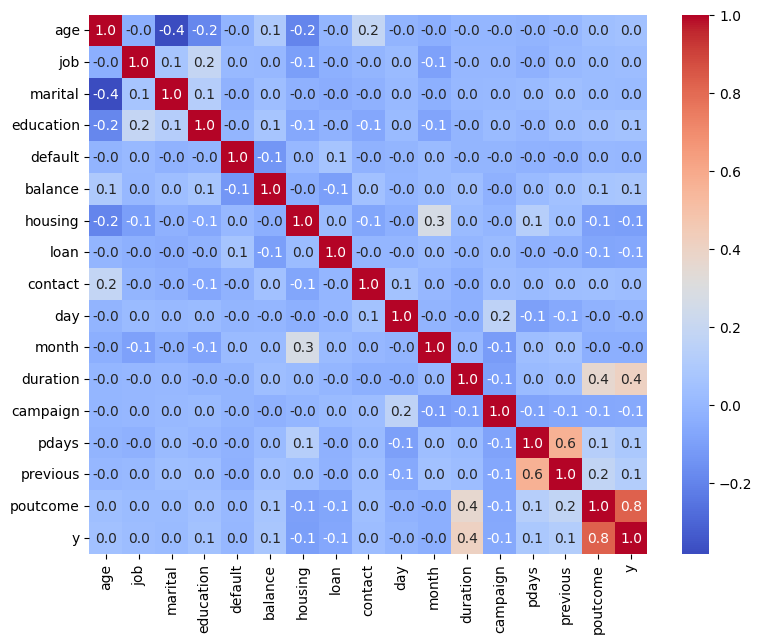

In [21]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".1f")

### handle unbalance data

<Axes: xlabel='y'>

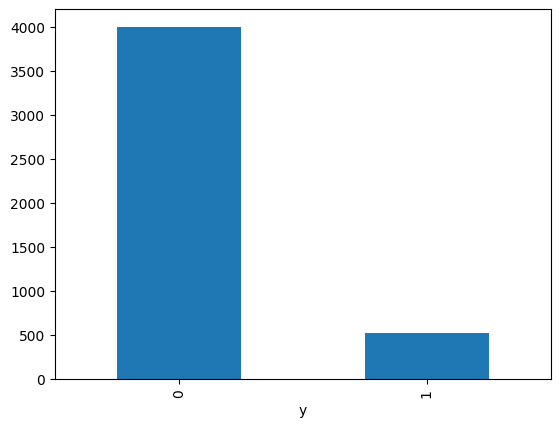

In [22]:
df['y'].value_counts().plot(kind='bar')


In [23]:
#class count
class_0_count,class_1_count=df['y'].value_counts()
print(f'class no count is {class_0_count} and class yes count is {class_1_count}')

class no count is 4000 and class yes count is 521


#### Inference: we can see that data is unbalanced and class (no)(majority class) has more values than class (yes)(minority class).

In [24]:
#divide by class
class_0=df[df['y']==0]
class_1=df[df['y']==1]

In [25]:
#rebalance data by oversampling the minority class (class_1)
class_1_oversampled=class_1.sample(class_0_count,replace=True)
class_1_oversampled.shape

(4000, 17)

In [26]:
#concating the oversampled class with the other class
df_oversampled=pd.concat([class_0,class_1_oversampled],axis=0)
df_oversampled.shape

(8000, 17)

<Axes: xlabel='y'>

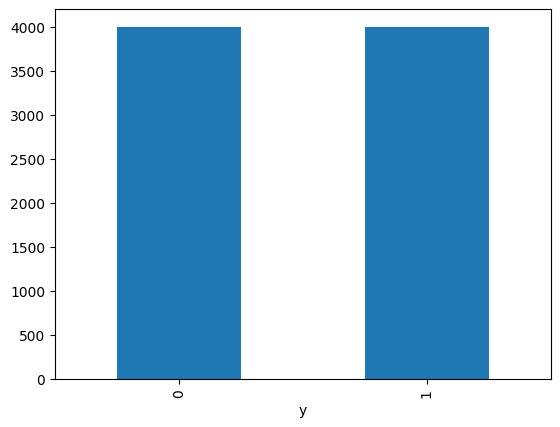

In [27]:
#visualize sentiment classes count after oversampling
df_oversampled['y'].value_counts().plot(kind='bar')

### Feature Reduction

In [28]:
#function for feature reduction based on highly correlated features
def corr_reduction(df,thresh):
    df_corr_mat=df.corr()
    correlated_features=set()
    for i in range(len(df_corr_mat.columns)):
        for j in range(i):
            if abs(df_corr_mat.iloc[i, j]) > thresh:
                print(i)
                print(df_corr_mat.columns[i]," ,is highly correlated with, ",df_corr_mat.columns[j])
                colname = df_corr_mat.columns[j]
                correlated_features.add(colname)
    
    df.drop(columns=correlated_features,axis=1,inplace=True)
    print(correlated_features,' are removed from data')


    return df

In [29]:
#feature reduction
print("the shape of data before feature reduction is: ",df.shape)
print("**************************************************************************")
df_red=corr_reduction(df,0.8)
print("**************************************************************************")

print("the shape of data after feature reduction is: ",df.shape)
df.head()

the shape of data before feature reduction is:  (4521, 17)
**************************************************************************
16
y  ,is highly correlated with,  poutcome
{'poutcome'}  are removed from data
**************************************************************************
the shape of data after feature reduction is:  (4521, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0
3,11,4,1,2,0,1352,1,1,0,2,6,195,3,0,0,0
4,40,1,1,1,0,274,1,0,0,4,8,222,0,0,0,0


## Data splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('y',axis=1)
Y = df['y']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## Machine Learning Model

In [32]:
#required models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import warnings
warnings.filterwarnings('ignore')

In [33]:
#datafrome to store models details
models_df=pd.DataFrame(columns=['train_acc','test_acc','f1-score'])

In [34]:
def train_model(model_name,model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    #train model on train data
    model.fit(X_train,y_train)
    
    #prediction over trian data
    y_train_pred = model.predict(X_train)
    
    #prediction over test data
    y_test_pred = model.predict(X_test)
    
    #train accuracy using accuracy score metric
    train_acc=round(accuracy_score(y_train,y_train_pred),2)*100
    print("training accuracy = ",train_acc)

    
    #test accuracy using accuracy score metric
    test_acc=round(accuracy_score(y_test,y_test_pred),2)*100
    print("testing accuracy = ",test_acc)
    
    #f1-score
    f1_s=round(f1_score(y_test, y_test_pred),2)*100
    print("f1-score = ",f1_s)


    #evaluate model using confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
    plt.show()
    print(classification_report(y_test,y_test_pred))
    
    #adding the model details to models data frame
    models_df.loc[model_name]=[train_acc,test_acc,f1_s]

### KNN Model

#### We'll start with k=1.

In [35]:
# knn = KNeighborsClassifier(n_neighbors=1)

training accuracy =  89.0
testing accuracy =  88.0
f1-score =  7.000000000000001


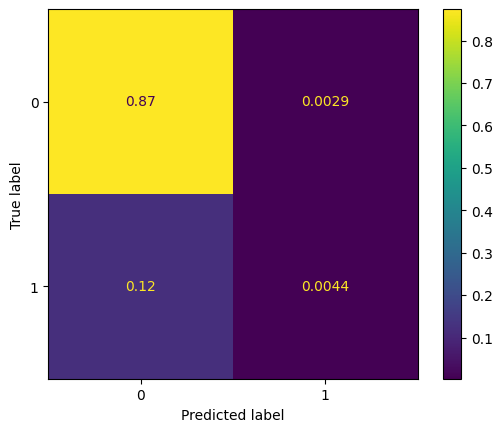

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1190
           1       0.60      0.04      0.07       167

    accuracy                           0.88      1357
   macro avg       0.74      0.52      0.50      1357
weighted avg       0.85      0.88      0.83      1357



In [36]:
kn=KNeighborsClassifier(n_neighbors=int(len(X_train)**0.5))
train_model('KNeighborsClassifie',kn)

### Choosing a K Value

#### Let's go ahead and use the elbow method to pick a good K Value:

In [37]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

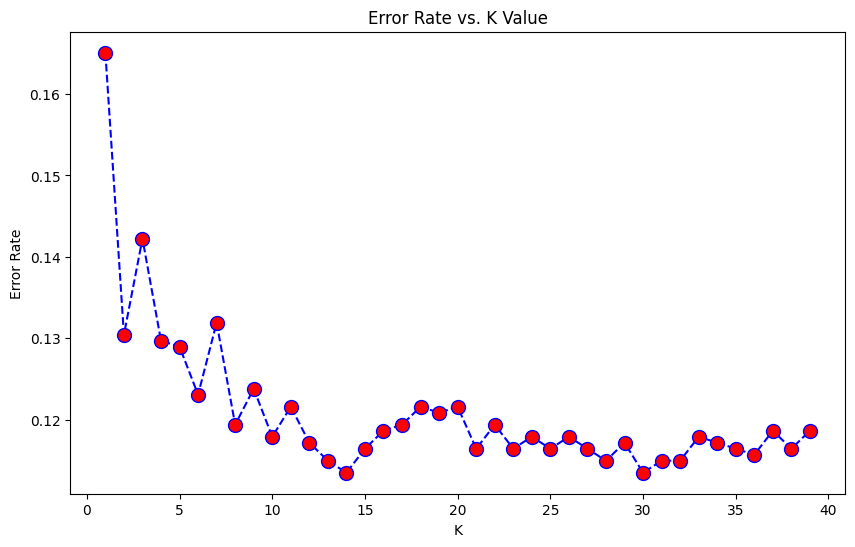

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### report

In [39]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=14
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


confusion_matrix
 [[1179   11]
 [ 143   24]]


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.69      0.14      0.24       167

    accuracy                           0.89      1357
   macro avg       0.79      0.57      0.59      1357
weighted avg       0.87      0.89      0.85      1357



## svm

### Train the Support Vector Classifier

training accuracy =  89.0
testing accuracy =  88.0
f1-score =  0.0


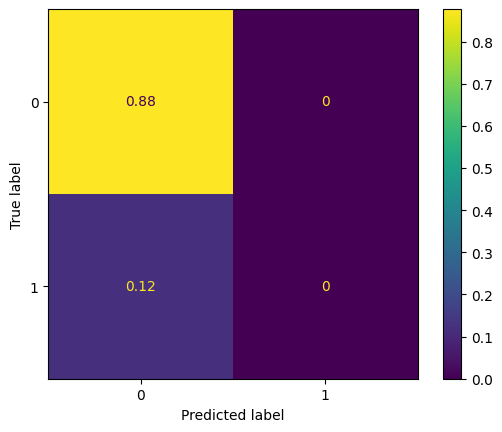

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1190
           1       0.00      0.00      0.00       167

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.77      0.88      0.82      1357



In [40]:
svc=SVC()
train_model('SVC',svc)

#### Woah! Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

We can search for parameters using a GridSearch!

## Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [41]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [42]:
from sklearn.model_selection import GridSearchCV

#### One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [43]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [44]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.888 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.888 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.889 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.889 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.888 total time=   0.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.888 total time=   0.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.888 total time=   0.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [46]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [47]:
grid_predictions = grid.predict(X_test)

In [48]:
print(confusion_matrix(y_test,grid_predictions))

[[1186    4]
 [ 164    3]]


In [49]:
print("confusion matrix \n", confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

confusion matrix 
 [[1186    4]
 [ 164    3]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1190
           1       0.43      0.02      0.03       167

    accuracy                           0.88      1357
   macro avg       0.65      0.51      0.48      1357
weighted avg       0.82      0.88      0.82      1357



### Decision Trees

In [50]:
dtree_gini = DecisionTreeClassifier(max_depth=5) ## default gini

In [51]:
dtree_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=5)

training accuracy =  91.0
testing accuracy =  89.0
f1-score =  43.0


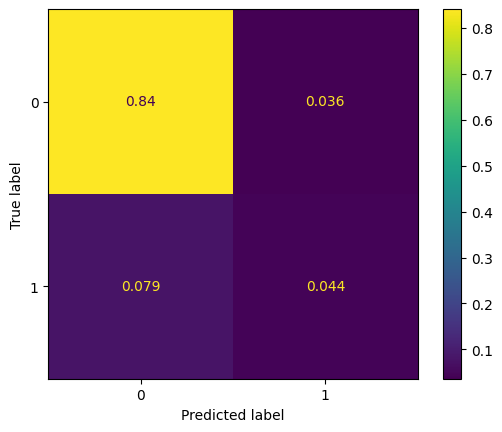

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1190
           1       0.55      0.36      0.43       167

    accuracy                           0.89      1357
   macro avg       0.73      0.66      0.69      1357
weighted avg       0.87      0.89      0.87      1357



In [52]:
train_model('dtree_gini',dtree_gini)

training accuracy =  91.0
testing accuracy =  88.0
f1-score =  44.0


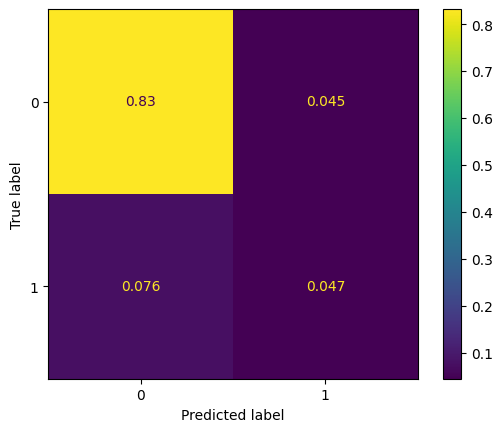

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1190
           1       0.51      0.38      0.44       167

    accuracy                           0.88      1357
   macro avg       0.71      0.67      0.69      1357
weighted avg       0.87      0.88      0.87      1357



In [53]:
train_model('dtree_entropy',dtree_entropy)

#### Tree Visualization

In [54]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  


from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y']

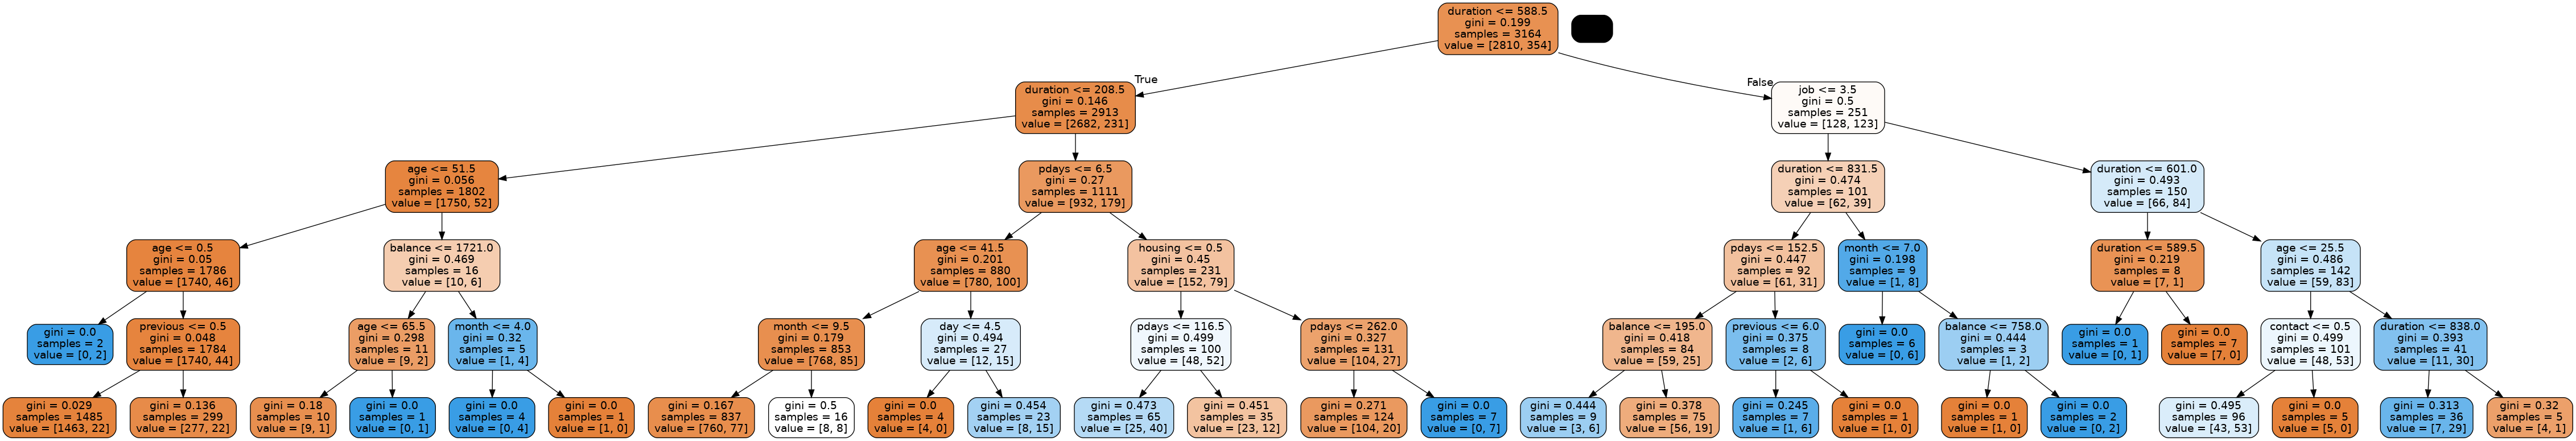

In [55]:
from six import StringIO
dot_data = StringIO()  
features = list(df.columns[:-1])
export_graphviz(dtree_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

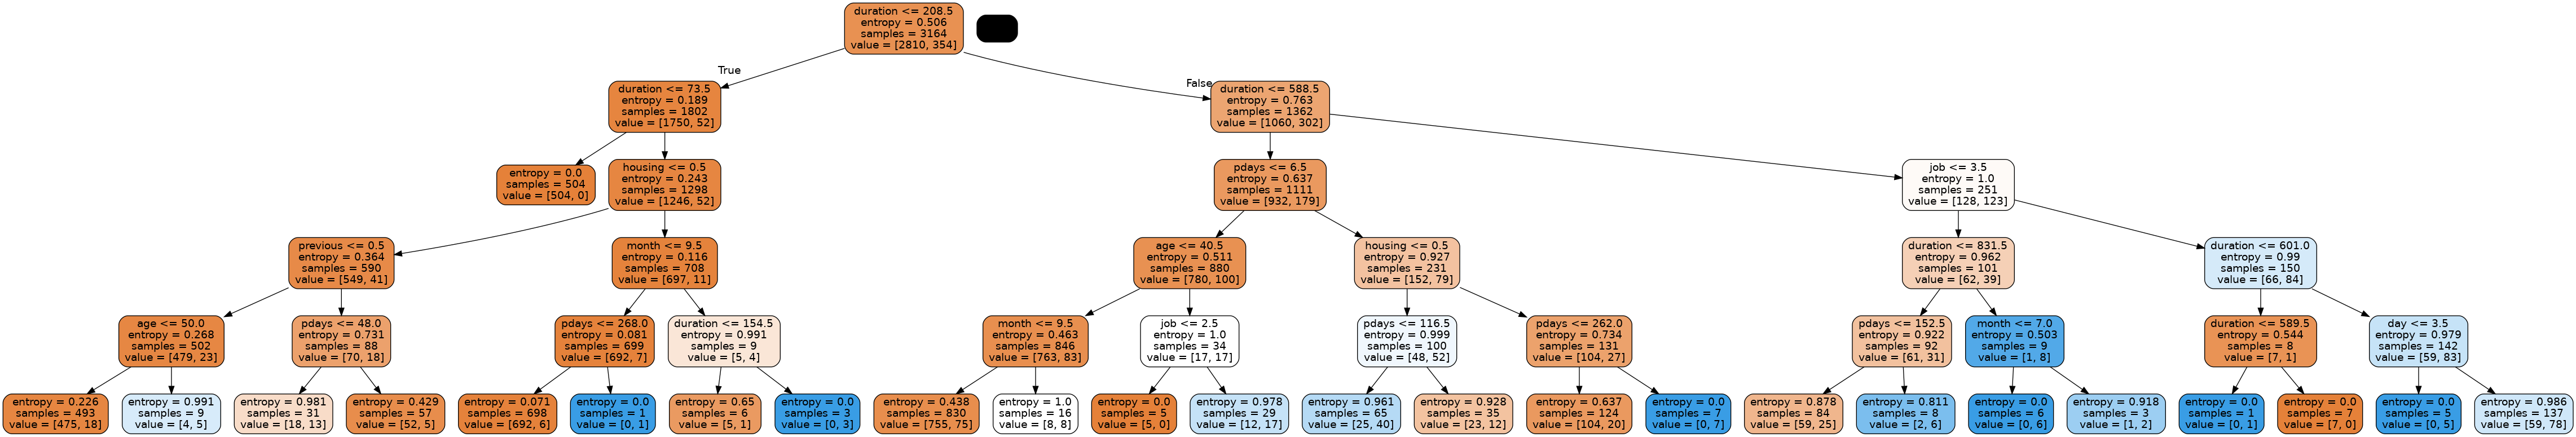

In [56]:
dot_data = StringIO()  
features = list(df.columns[:-1])
export_graphviz(dtree_entropy, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Naive Bayes

training accuracy =  86.0
testing accuracy =  85.0
f1-score =  41.0


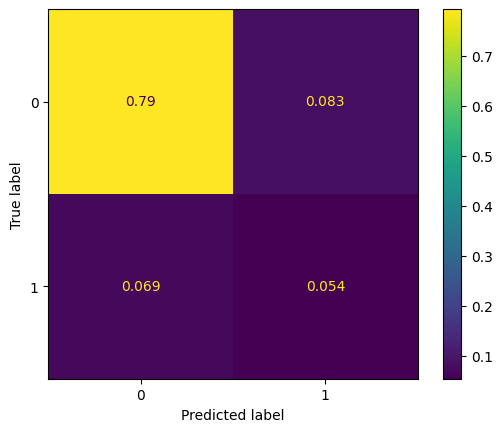

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1190
           1       0.39      0.44      0.41       167

    accuracy                           0.85      1357
   macro avg       0.66      0.67      0.66      1357
weighted avg       0.85      0.85      0.85      1357



In [57]:
model = GaussianNB()
train_model('Naive Bayes',model)

### Comparing Models Performance

In [58]:
models_df.sort_values(by='test_acc',ascending=False,inplace=True) #test accuracy
models_df

,train_acc,test_acc,f1-score
dtree_gini,91.0,89.0,43.0
KNeighborsClassifie,89.0,88.0,7.0
SVC,89.0,88.0,0.0
dtree_entropy,91.0,88.0,44.0
Naive Bayes,86.0,85.0,41.0


### K fold cross validation

In [59]:
# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [60]:
# defining kfold
kfold = KFold(n_splits=5, random_state=1, shuffle = True)

In [61]:
#datafrome to store models details
models_dif=pd.DataFrame(columns=['accuracy'])

In [62]:
def train_model_base_k_fold(model_name,model,X_train=X_train,y_train=y_train, cv=kfold):
    # storing accuracy values of model for every fold in "results"
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print("let's see the value of accuracy for every fold:" ,results)
    # let's see the mean accuracy score
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    accuracy = results.mean()*100.0
    
    #adding the model details to models data frame
    models_dif.loc[model_name]=[accuracy]

### knn

In [63]:
# defining the model
kn = KNeighborsClassifier(n_neighbors=int(len(X_train)**0.5))
train_model_base_k_fold("knn", kn)

let's see the value of accuracy for every fold: [0.88467615 0.87045814 0.90837283 0.87835703 0.89240506]
Accuracy: 88.685% (1.296%)


### svm

In [64]:
svc=SVC()
train_model_base_k_fold("svc", svc)

let's see the value of accuracy for every fold: [0.88941548 0.87361769 0.90995261 0.87835703 0.88924051]
Accuracy: 88.812% (1.253%)


### Naive Bayes

In [65]:
model = GaussianNB()
train_model_base_k_fold("Naive Bayes", model)

let's see the value of accuracy for every fold: [0.86729858 0.82938389 0.85150079 0.85308057 0.88607595]
Accuracy: 85.747% (1.875%)


### Decision Trees

In [66]:
dtree_gini = DecisionTreeClassifier(max_depth=5) ## default gini

In [67]:
dtree_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [68]:
train_model_base_k_fold("dtree_gini", dtree_gini)

let's see the value of accuracy for every fold: [0.90363349 0.87361769 0.88941548 0.86729858 0.87816456]
Accuracy: 88.243% (1.283%)


In [69]:
train_model_base_k_fold("dtree_entropy", dtree_entropy)

let's see the value of accuracy for every fold: [0.89731438 0.85939968 0.8957346  0.88309637 0.88765823]
Accuracy: 88.464% (1.366%)


### Comparing Models Performance

In [70]:
models_dif

,accuracy
knn,88.685384
svc,88.811666
Naive Bayes,85.746795
dtree_gini,88.242596
dtree_entropy,88.464065
